# Задание 1.1

Используя код из лекции, попробуйте обучить RNN с 2 скрытыми слоями на следующих периодичных данных и визуализируйте результат.

In [2]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [3]:
input_size = 1
hidden_size = 2

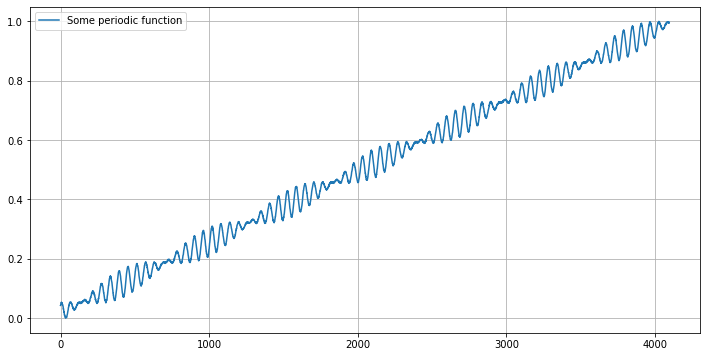

In [4]:
training_data = []
for i in range(4096):
    training_data.append(math.sin(i / 10) +
                         math.cos((i) / 9) +
                         i / 100 +
                         (random.random() - 0.5) / 5)
training_data = np.array(training_data).reshape((len(training_data), 1))
# Min - Max normalization
training_data -= training_data.min()
training_data = training_data / training_data.max()
# plotting
plt.figure(figsize=(12, 6))
plt.plot(training_data, label='Some periodic function')
plt.legend()
plt.grid()
plt.show()

# Задание 1.2

Теперь обучите на этих же данных LSTM с 2 скрытыми слоями и визуализируйте результат.

# Задание 1.3

Произведите аналогичные действия с GRU моделью.

# Задание 1.4

Сравните результаты и скорость работы RNN, LSTM и GRU. 

# Задание 2

Возьмите следующий набор данных и, используя код из лекции, создайте реккурентную сеть для генерации фамилий. Для ускорения обучения переносите данные и модель на видеокарту. Подумайте, как получить разные фамилии, начинающиеся на одну и ту же букву.


In [4]:
import gdown
import math
import random

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
DEVICE = 'cuda'

!pip install gdown

surnames_url = 'https://drive.google.com/uc?id=1-hODpM4XoGOzJP2dUVQDww1gVKkWt_jm'
surnames_file_name = 'surnames.txt'
gdown.download(surnames_url, surnames_file_name, quiet=False)

ModuleNotFoundError: No module named 'gdown'

In [ ]:
with open(surnames_file_name, encoding='utf-8') as s_file:
    surnames_list = [line.strip().lower() for line in s_file.readlines()]

In [ ]:
print(surnames_list)

# Задание 3

Возьмите произведение Гете "Фауст" и обучите на нем LSTM модель для посимвольной генерации текста.


In [ ]:
import gdown
import math
import random
from collections import Counter

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
DEVICE = 'cuda'

!pip install gdown

In [ ]:
surnames_url = 'https://drive.google.com/uc?id=1R8j3JOXslnepnU8axVI9SUr0n5U8spy0'
faust_text_file = 'Faust.txt'
gdown.download(surnames_url, faust_text_file, quiet=False)


with open(faust_text_file) as text_file:
    faust_text = ''.join(text_file.readlines())

# Задание 4

Возьмите набор данных эмоциональных окрасок отзывов fetch_20newsgroups. Получите эмбединг из трансформера BERT и классифицируйте при помощи логистической регрессии.


In [ ]:
!pip install transformers
!pip install datasets

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = load_dataset("emotion", split="train")
train_df = pd.DataFrame({'text': train['text'], 'emotion': train['label']})
train_df.head()

In [ ]:

model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)